In [162]:
# Import Modules
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [163]:
# Import Data
data = pd.read_excel('/Users/talhajamal/Desktop/Code/Regression_Analysis/data/data_coursework_Q1.xls')

# Drop certain columns and rows
data = data.iloc[3:, 0:8]
data.drop(['Unnamed: 0', 'Unnamed: 5'], axis=1, inplace=True)
data.columns = ['Year', 'Month', 'Date', '1M T-bill', 'SP500', 'IBM']
data = data[['Date', 'Year', 'Month', '1M T-bill', 'SP500', 'IBM']]
data.dropna(inplace=True)
data.reset_index(inplace=True)

In [164]:
# Generate Features for Simple CAPM Regression
data['Rf'] = data['1M T-bill'] / 100
data['Ri'] = (data['IBM'] / data['IBM'].shift(1)) - 1
data['Rm'] = (data['SP500'] / data['SP500'].shift(1)) - 1
data['Excess Return'] = data['Ri'] - data['Rf']
data['Market Excess Return'] = data['Rm'] - data['Rf']
data.dropna(inplace=True)
data.head()

,index,Date,Year,Month,1M T-bill,SP500,IBM,Rf,Ri,Rm,Excess Return,Market Excess Return
1,25,FEB 1962,1962,2,0.20,70.22,2.66,0.0020,-0.011152,0.016650,-0.013152,0.014650
2,26,MAR 1962,1962,3,0.20,70.29,2.64,0.0020,-0.007519,0.000997,-0.009519,-0.001003
3,27,APR 1962,1962,4,0.22,68.05,2.25,0.0022,-0.147727,-0.031868,-0.149927,-0.034068
4,28,MAY 1962,1962,5,0.24,62.99,1.95,0.0024,-0.133333,-0.074357,-0.135733,-0.076757
5,29,JUN 1962,1962,6,0.20,55.63,1.68,0.0020,-0.138462,-0.116844,-0.140462,-0.118844


In [165]:
# Do a 80-20 split of data for training and testing the CAPM Model
M1_train = data[ :277]
M1_test = data[ 277:]

M1_X_train = M1_train[['Market Excess Return']] # Train features must be 2D
M1_Y_train = M1_train['Excess Return'] # Target feature must be 1D

M1_X_test = M1_test[['Market Excess Return']]
M1_Y_test = M1_test['Excess Return']

In [166]:
# Run Simple CAPM Model
model_1 = LinearRegression()
model_1.fit(M1_X_train, M1_Y_train)

# Generate Predictions
M1_Y_pred = model_1.predict(M1_X_test)

In [167]:
# Simple CAPM Results
# Coefficient and Intercept
print(f"Coefficient: {model_1.coef_[0]}")
print(f"Intercept: {model_1.intercept_}")

# Scoring the model (R^2 Score)
M1_r2_score = model_1.score(M1_X_test, M1_Y_test)
print(f"R^2 Score: {M1_r2_score}")

Coefficient: 0.8778816688364846
Intercept: 0.004965732301800065
R^2 Score: 0.28704873559643507


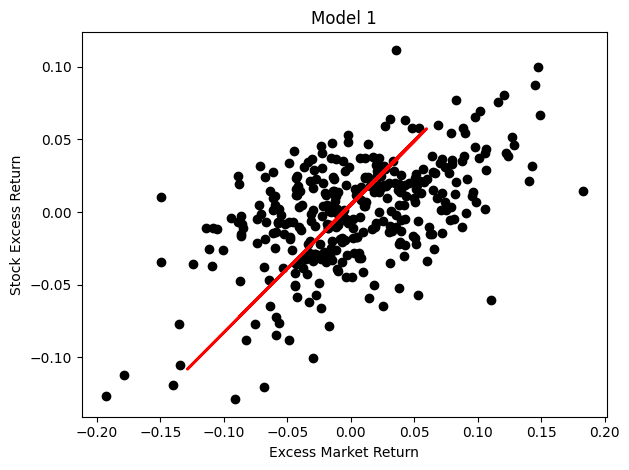

In [168]:
# Plotting the results
plt.scatter(data['Excess Return'], data['Market Excess Return'], color='black')
plt.plot(M1_X_test, M1_Y_pred, color='red', linewidth=2)
plt.xlabel('Excess Market Return')
plt.ylabel('Stock Excess Return')
plt.title('Model 1')
plt.tight_layout()
plt.show()

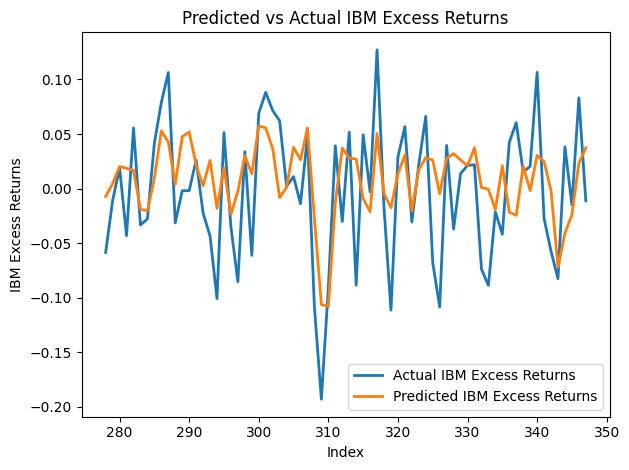

In [173]:
# Plotting Prediction and Actual Values
plt.plot(Y_test.index, Y_test, label='Actual IBM Excess Returns', linewidth=2)
plt.plot(Y_test.index, Y_pred, label='Predicted IBM Excess Returns', linewidth=2)
plt.xlabel('Index')
plt.ylabel('IBM Excess Returns')
plt.title('Predicted vs Actual IBM Excess Returns')
plt.legend()
plt.tight_layout()
plt.show()

In [174]:
# Multiple Factor Model
# Create D -> Indicator Variable for Positive Market Excess Returns
data['D'] = (data['Market Excess Return'] > 0).astype(int)

# Generate Features
data['Factor 1'] = data['D']*data['Market Excess Return']
data['Factor 2'] = (1 - data['D'])*data['Market Excess Return']
data['Factor 3'] = (data['Market Excess Return'])**2

data.head()


,index,Date,Year,Month,1M T-bill,SP500,IBM,Rf,Ri,Rm,Excess Return,Market Excess Return,D,Factor 1,Factor 2,Factor 3
1,25,FEB 1962,1962,2,0.20,70.22,2.66,0.0020,-0.011152,0.016650,-0.013152,0.014650,1,0.01465,0.000000,0.000215
2,26,MAR 1962,1962,3,0.20,70.29,2.64,0.0020,-0.007519,0.000997,-0.009519,-0.001003,0,-0.00000,-0.001003,0.000001
3,27,APR 1962,1962,4,0.22,68.05,2.25,0.0022,-0.147727,-0.031868,-0.149927,-0.034068,0,-0.00000,-0.034068,0.001161
4,28,MAY 1962,1962,5,0.24,62.99,1.95,0.0024,-0.133333,-0.074357,-0.135733,-0.076757,0,-0.00000,-0.076757,0.005892
5,29,JUN 1962,1962,6,0.20,55.63,1.68,0.0020,-0.138462,-0.116844,-0.140462,-0.118844,0,-0.00000,-0.118844,0.014124


In [175]:
# Do a 80-20 split of data for training and testing the CAPM Model
M2_train = data[ :277]
M2_test = data[ 277:]

M2_X_train = M2_train[['Factor 1', 'Factor 2', 'Factor 3']] # Train features must be 2D
M2_Y_train = M2_train['Excess Return'] # Target feature must be 1D

M2_X_test = M2_test[['Factor 1', 'Factor 2', 'Factor 3']]
M2_Y_test = M2_test['Excess Return']

In [176]:
# Run Multiple Factor CAPM Model
model_2 = LinearRegression()
model_2.fit(M2_X_train, M2_Y_train)

# Coefficient and Intercept
print(f"Coefficients: {model_2.coef_}")
print(f"Intercept: {model_2.intercept_}")

# Scoring the model (R^2 Score)
M2_r2_score = model_2.score(M2_X_test, M2_Y_test)
print(f"R^2 Score: {M2_r2_score}")

Coefficients: [ 1.52149705  0.23942446 -4.95589876]
Intercept: -0.005941013991340763
R^2 Score: 0.30727175419123753


In [177]:
# Predictions
M2_Y_pred = model_2.predict(M2_X_test)

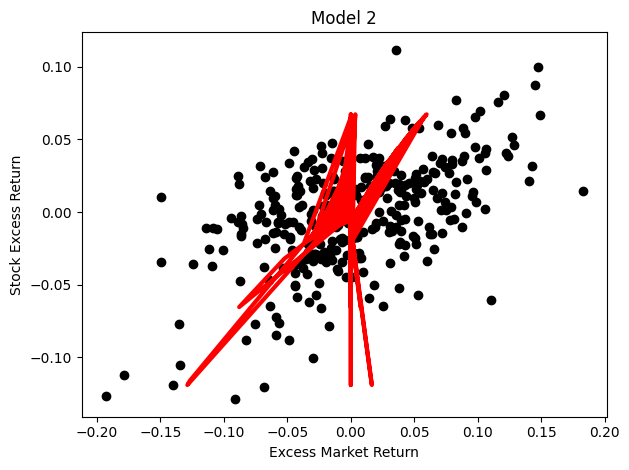

In [178]:
# Plotting the results
plt.scatter(data['Excess Return'], data['Market Excess Return'], color='black')
plt.plot(M2_X_test, M2_Y_pred, color='red', linewidth=3)
plt.xlabel('Excess Market Return')
plt.ylabel('Stock Excess Return')
plt.title('Model 2')
plt.tight_layout()
plt.show()

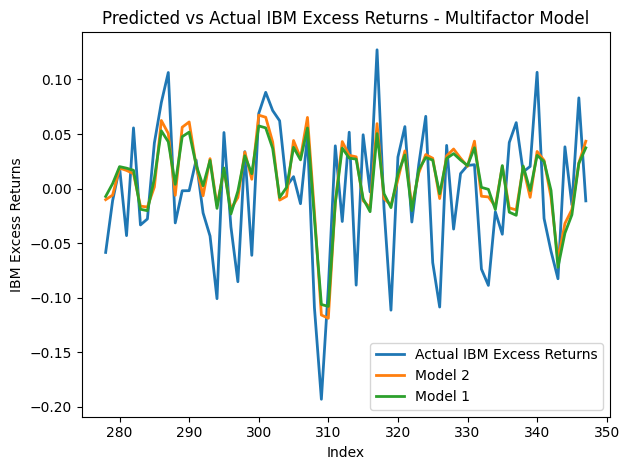

In [179]:
# Plotting Prediction and Actual Values
plt.plot(M2_Y_test.index, M2_Y_test, label='Actual IBM Excess Returns', linewidth=2)
plt.plot(M2_Y_test.index, M2_Y_pred, label='Model 2', linewidth=2)
plt.plot(M2_Y_test.index, Y_pred, label='Model 1', linewidth=2)
plt.xlabel('Index')
plt.ylabel('IBM Excess Returns')
plt.title('Predicted vs Actual IBM Excess Returns - Multifactor Model')
plt.legend()
plt.tight_layout()
plt.show()

In [183]:
print(f"R Square for Model 1: {M1_r2_score}")
print(f"R Square for Model 2: {M2_r2_score}")

R Square for Model 1: 0.28704873559643507
R Square for Model 2: 0.30727175419123753
